#Lectura y procesamiento de los resultados de los mejores modelos CNN

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de CNN. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/cnn/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/leer_procesar_modelos_NARMAX/cnn


In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsCNN2S = pd.read_excel('grilla_CNN_NARMAX_2STEPS.xlsx', header=0)
summaryModelsCNN4S = pd.read_excel('grilla_CNN_NARMAX_4STEPS.xlsx', header=0)
summaryModelsCNN8S = pd.read_excel('grilla_CNN_NARMAX_8STEPS.xlsx', header=0)
summaryModelsCNN16S = pd.read_excel('grilla_CNN_NARMAX_16STEPS.xlsx', header=0)

grilla_CNN_NARMAX_AQP = pd.concat([summaryModelsCNN2S, summaryModelsCNN4S], ignore_index=True)
grilla_CNN_NARMAX_AQP = pd.concat([grilla_CNN_NARMAX_AQP, summaryModelsCNN8S], ignore_index=True)
grilla_CNN_NARMAX_AQP = pd.concat([grilla_CNN_NARMAX_AQP, summaryModelsCNN16S], ignore_index=True)

grilla_CNN_NARMAX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     2992 non-null   float64
 1   delayedSteps            2992 non-null   int64  
 2   nameModel               2992 non-null   object 
 3   nameHistory             2992 non-null   object 
 4   nameConfiguration       2992 non-null   object 
 5   timeTrain (in seconds)  2992 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 140.4+ KB


##La cantidad de modelos generados para el CNN NARMAX de AQP fue de 1922

In [5]:
rslt_df = grilla_CNN_NARMAX_AQP.sort_values('MAE')
total = grilla_CNN_NARMAX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_CNN_NARMAX_AQP.describe()

Tiempo total: 433346.54000000004


MAE  delayedSteps  timeTrain (in seconds)
count  2992.000000   2992.000000             2992.000000
mean      0.327126      7.425134              144.835074
std       0.045658      5.324735               44.381771
min       0.271815      2.000000               41.900000
25%       0.304619      2.000000              113.495000
50%       0.314876      4.000000              134.495000
75%       0.333125      8.000000              167.987500
max       0.488374     16.000000              567.190000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 433346, lo que equivale a 120 horas aproximadamente. Además se tienen las estadisticas resumen.

In [9]:
rslt_df.iloc[:50,:]

MAE  ...  timeTrain (in seconds)
2567  0.271815  ...                  127.70
2579  0.272879  ...                  125.34
2561  0.273273  ...                  124.99
2957  0.273557  ...                  225.52
2965  0.273654  ...                  238.47
2471  0.273932  ...                  116.26
2655  0.273989  ...                  136.33
2941  0.274042  ...                  234.55
2465  0.274131  ...                  106.97
2765  0.274222  ...                  163.45
2755  0.274645  ...                  173.81
2845  0.274742  ...                  207.03
2849  0.274787  ...                  197.34
2391  0.274970  ...                  110.72
2749  0.275143  ...                  172.03
2653  0.275345  ...                  133.10
2273  0.275443  ...                   88.27
2945  0.275525  ...                  232.06
2773  0.275712  ...                  174.09
2309  0.275730  ...                   89.22
2385  0.275815  ...                  111.32
2279  0.275819  ...                   97.06
2661  0.275875  ...                  138.01
2469  0.275910  ...                  109.75
2285  0.275988  ...                   92.56
2477  0.276040  ...                  104.98
2481  0.276043  ...                  111.60
2669  0.276220  ...                  137.53
2761  0.276396  ...                  185.03
2961  0.276418  ...                  225.19
2847  0.276420  ...                  198.83
2577  0.276448  ...                  129.96
2583  0.276508  ...                  133.20
2675  0.276515  ...                  148.24
2949  0.276526  ...                  229.76
2371  0.276569  ...                  107.32
2369  0.276642  ...                  107.94
2375  0.276662  ...                  111.15
2759  0.276666  ...                  179.02
2811  0.276752  ...                  174.73
2757  0.276840  ...                  170.60
2569  0.276841  ...                  129.79
2853  0.276877  ...                  217.75
2857  0.276879  ...                  241.74
2859  0.276997  ...                  208.66
2977  0.277041  ...                  220.74
2785  0.277179  ...                  166.27
2573  0.277189  ...                  126.01
2463  0.277193  ...                  102.60
2575  0.277194  ...                  122.01

[50 rows x 6 columns]

In [10]:
rslt_df.iloc[0,:]

MAE                                                                0.271815
delayedSteps                                                             16
nameModel                 results/CNN_1647_1_64_5_sigmoid_same_256_relu_...
nameHistory               results/CNN_1647_1_64_5_sigmoid_same_256_relu_...
nameConfiguration         results/CNN_1647_1_64_5_sigmoid_same_256_relu_...
timeTrain (in seconds)                                                127.7
Name: 2567, dtype: object

In [11]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAE                                                                0.271815
delayedSteps                                                             16
nameModel                 results/CNN_1647_1_64_5_sigmoid_same_256_relu_...
nameHistory               results/CNN_1647_1_64_5_sigmoid_same_256_relu_...
nameConfiguration         results/CNN_1647_1_64_5_sigmoid_same_256_relu_...
timeTrain (in seconds)                                                127.7
Name: 2567, dtype: object


In [12]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/CNN_1647_1_64_5_sigmoid_same_256_relu_mean_absolute_error_16S_history.npy
results/CNN_1647_1_64_5_sigmoid_same_256_relu_mean_absolute_error_16S_config.npy
results/CNN_1647_1_64_5_sigmoid_same_256_relu_mean_absolute_error_16S.h5


In [13]:
#para recuperar history
history=np.load('CNN_1647_1_64_5_sigmoid_same_256_relu_mean_absolute_error_16S_history.npy',allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load('CNN_1647_1_64_5_sigmoid_same_256_relu_mean_absolute_error_16S_config.npy',allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model('CNN_1647_1_64_5_sigmoid_same_256_relu_mean_absolute_error_16S.h5')
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [0.2955784499645233, 0.27311697602272034, 0.2635340392589569, 0.25647303462028503, 0.24994578957557678, 0.2446277141571045, 0.24227309226989746, 0.24007143080234528, 0.23519854247570038, 0.2324352115392685, 0.23094114661216736, 0.22878985106945038, 0.22510302066802979, 0.22083823382854462, 0.22009342908859253, 0.21863529086112976, 0.2149832546710968, 0.21218936145305634, 0.2112763226032257, 0.20924408733844757, 0.20656871795654297, 0.20506104826927185, 0.20369277894496918, 0.2023322433233261, 0.19889220595359802, 0.1978921890258789, 0.1955515295267105, 0.19647078216075897, 0.1921340376138687, 0.19054482877254486, 0.19017523527145386, 0.18951515853405, 0.18659748136997223, 0.18449191749095917, 0.18302585184574127, 0.1818181872367859, 0.1801213175058365, 0.17863386869430542, 0.17741860449314117, 0.17579878866672516, 0.1755782961845398, 0.17358434200286865, 0.17060969769954681, 0.16996358335018158, 0.16939055919647217, 0.16685932874679565, 0.1670113205909729, 0.16561757028102875,

In [14]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/dataTrainNarmaxScaledCNN.csv', header=0)
  testDFScaled = pd.read_csv('data/dataTestNarmaxScaledCNN.csv', header=0)
  trainDF = pd.read_csv('data/dataTrainNarmaxCNN.csv', header=0)
  testDF = pd.read_csv('data/dataTestNarmaxCNN.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

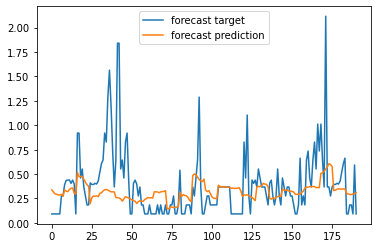

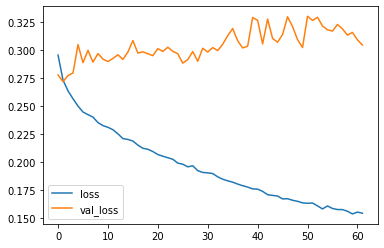

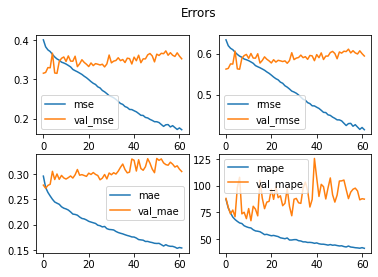

In [15]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)